## Importing Libraries

In [2]:
import os
import math
import cv2
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras import layers
from PIL import Image, ImageOps
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import seaborn as sns
from skimage import io

In [4]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,GlobalAveragePooling2D

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.layers import AveragePooling2D

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
input_size = (227, 227)

In [44]:
training_set = train_datagen.flow_from_directory('Dataset_Face/Split/augmented_train',
                                                 target_size = input_size,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset_Face/Split/validation',
                                            target_size = input_size,
                                            batch_size = 32,
                                            class_mode = 'categorical')

        
imgs, labels = next(training_set)
print(len(imgs))

Found 1524 images belonging to 14 classes.
Found 98 images belonging to 14 classes.
32


In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(14, activation='softmax')
])

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [28]:
history = model.fit(training_set,
          epochs=25,
          validation_data=test_set)

Epoch 1/25
48/48 [==============================] - 192s 4s/step - loss: 4.2467 - accuracy: 0.1470 - val_loss: 2.6662 - val_accuracy: 0.0612
Epoch 2/25
48/48 [==============================] - 180s 4s/step - loss: 3.2088 - accuracy: 0.1936 - val_loss: 2.6948 - val_accuracy: 0.0612
Epoch 3/25
48/48 [==============================] - 158s 3s/step - loss: 2.8182 - accuracy: 0.2539 - val_loss: 2.7634 - val_accuracy: 0.0510
Epoch 4/25
48/48 [==============================] - 150s 3s/step - loss: 2.4846 - accuracy: 0.2999 - val_loss: 2.8020 - val_accuracy: 0.1020
Epoch 5/25
48/48 [==============================] - 152s 3s/step - loss: 2.2152 - accuracy: 0.3346 - val_loss: 2.8034 - val_accuracy: 0.1224
Epoch 6/25
48/48 [==============================] - 149s 3s/step - loss: 1.9889 - accuracy: 0.3917 - val_loss: 2.7358 - val_accuracy: 0.1327
Epoch 7/25
48/48 [==============================] - 150s 3s/step - loss: 1.9013 - accuracy: 0.4134 - val_loss: 2.6648 - val_accuracy: 0.1633
Epoch 8/25
48

In [30]:
model.save('Models/alexnet_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


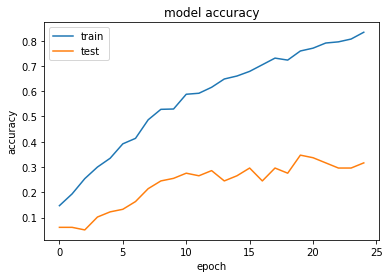

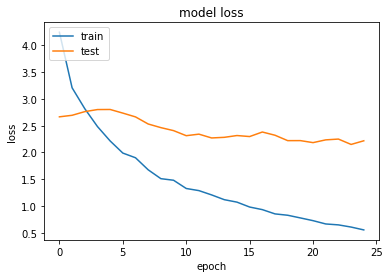

In [34]:
#list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
best_train_accuracy = history.history['accuracy'][np.argmin(history.history['loss'])]
best_train_accuracy

0.8333333134651184

In [36]:
max(history.history['accuracy'])

0.8333333134651184

In [37]:
best_test_accuracy = history.history['val_accuracy'][np.argmin(history.history['val_loss'])]
best_test_accuracy

0.29591837525367737

In [38]:
max(history.history['val_accuracy'])

0.3469387888908386